# Crop price recommender system

In [1]:
# IMPORTING FILES
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath
from matplotlib import pyplot as plt

In [2]:
# IN-HOUSE FUNCTION: RETURN DIRECTORY SPECIFIC TO RUNNING OS
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# VARIABLES
HARGAPANGAN_LOCATION = get_directory('./dataset/time-series')
TRAIN_SPLIT = 0.8
WINDOW_SIZE = 180
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

# TEST
print(HARGAPANGAN_LOCATION)

dataset\time-series


For the following code block, we are getting all the data from four excel files (trust me, the data is spread horizontally and I don't wanna mess too much)

In [4]:
_hp_20_21 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2020 to 2021.xlsx'), skiprows=8).transpose().drop('No.')
_hp_20_21.columns = _hp_20_21.iloc[0]
_hp_20_21 = _hp_20_21.drop(_hp_20_21.index[0])
_hp_19_20 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2019 to 2020.xlsx'), skiprows=8).transpose().drop('No.')
_hp_19_20.columns = _hp_19_20.iloc[0]
_hp_19_20 = _hp_19_20.drop(_hp_19_20.index[0])
_hp_18_19 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2018 to 2019.xlsx'), skiprows=8).transpose().drop('No.')
_hp_18_19.columns = _hp_18_19.iloc[0]
_hp_18_19 = _hp_18_19.drop(_hp_18_19.index[0])
_hp_17_18 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2017 to 2018.xlsx'), skiprows=8).transpose().drop('No.')
_hp_17_18.columns = _hp_17_18.iloc[0]
_hp_17_18 = _hp_17_18.drop(_hp_17_18.index[0])
#_hp_20_21 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2020 to 2021.xlsx'), skiprows=8).transpose().drop('No.')

In [5]:
_hp_17_18

Komoditas(Rp),Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Daging Ayam,Daging Ayam Ras Segar (kg),Daging Sapi,...,Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg),Minyak Goreng,Minyak Goreng Curah (kg),Minyak Goreng Kemasan Bermerk 1 (kg),Minyak Goreng Kemasan Bermerk 2 (kg),Gula Pasir,Gula Pasir Kualitas Premium (kg),Gula Pasir Lokal (kg)
31/07/2017,10900,9950,9450,11000,10850,12450,11850,32500,32500,115350,...,35700,29300,44300,13650,11750,14750,14150,14600,16400,13050
01/08/2017,10950,9900,9450,11050,10850,12450,11850,32650,32650,115000,...,35950,29950,44150,13650,11750,14750,14150,14600,16400,13050
02/08/2017,10950,9900,9450,11000,10800,12450,11850,32650,32650,114950,...,35600,29850,43400,13650,11750,14750,14150,14600,16450,13050
03/08/2017,10950,9900,9450,11050,10850,12450,11850,32800,32800,115100,...,35700,30100,43250,13650,11750,14750,14150,14600,16400,13050
04/08/2017,11000,9900,9750,11050,10850,12450,11850,32950,32950,114850,...,35600,30050,43200,13650,11750,14750,14150,14600,16400,13050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/05/2018,11500,10450,10050,11650,11400,12900,12450,33850,33850,115100,...,31900,29300,35300,13350,11650,14450,13800,13700,15350,12350
07/05/2018,11500,10450,10050,11650,11400,12900,12450,34350,34350,114850,...,31550,29500,34350,13400,11650,14450,13800,13700,15350,12350
08/05/2018,11500,10450,10050,11650,11400,12900,12450,34550,34550,115250,...,31450,29300,34250,13400,11650,14450,13800,13700,15350,12350
09/05/2018,11500,10450,10050,11650,11400,12900,12450,34700,34700,115300,...,31550,29250,34500,13400,11650,14450,13800,13700,15350,12350


In [6]:
# Creating the master dataset
HARGA_PANGAN = pd.concat([_hp_17_18, _hp_18_19, _hp_19_20, _hp_20_21], ignore_index=False).dropna()

In [7]:
HARGA_PANGAN_BERAS = np.delete(HARGA_PANGAN['Beras'].values, 0).astype(int)

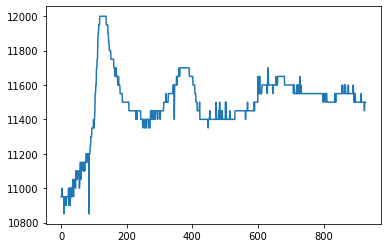

In [8]:
# Here is the time series for the average rice value in Indonesia

plt.plot(range(len(HARGA_PANGAN_BERAS)), HARGA_PANGAN_BERAS)
plt.show()

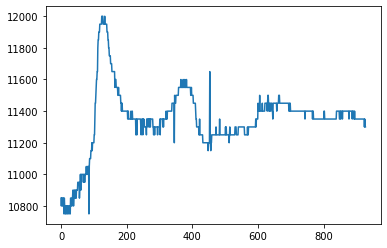

In [9]:
# Harga Beras Medium - Beras Kualitas Medium II (kg)
BERAS_MEDIUM = np.delete(HARGA_PANGAN['Beras Kualitas Medium II (kg)'].values, 0).astype(int)
plt.plot(range(len(BERAS_MEDIUM)), BERAS_MEDIUM)
plt.show()

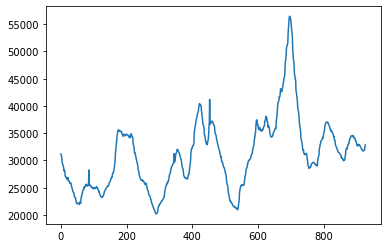

In [10]:
# Harga Bawang Merah
BAWANG_MERAH = np.delete(HARGA_PANGAN['Bawang Merah'].values, 0).astype(int)
plt.plot(range(len(BAWANG_MERAH)), BAWANG_MERAH)
plt.show()

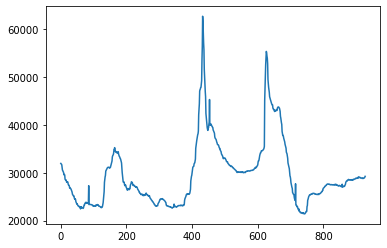

In [11]:
# Harga Bawang Putih
BAWANG_PUTIH = np.delete(HARGA_PANGAN['Bawang Putih'].values, 0).astype(int)
plt.plot(range(len(BAWANG_PUTIH)), BAWANG_PUTIH)
plt.show()

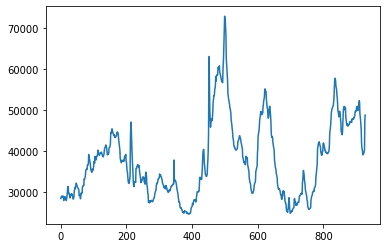

In [12]:
# Harga Cabai Merah
CABAI_MERAH = np.delete(HARGA_PANGAN['Cabai Merah'].values, 0).astype(int)
plt.plot(range(len(CABAI_MERAH)), CABAI_MERAH)
plt.show()

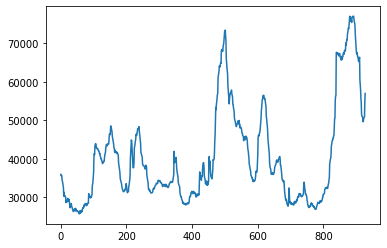

In [13]:
# Harga Cabai Rawit
CABAI_RAWIT = np.delete(HARGA_PANGAN['Cabai Rawit'].values, 0).astype(int)
plt.plot(range(len(CABAI_RAWIT)), CABAI_RAWIT)
plt.show()

Verdict: we will be using bawang merah.

## Data preparation - for machine learning model

In [14]:
# Data normalisation
BAWANG_MERAH = BAWANG_MERAH / 50000

In [15]:
# Train-test split
_count = len(BAWANG_MERAH)
BAWANG_MERAH_TRAIN = BAWANG_MERAH[:int(_count*TRAIN_SPLIT)]
BAWANG_MERAH_TEST = BAWANG_MERAH[int(_count*TRAIN_SPLIT):]

In [17]:
BAWANG_MERAH_TRAIN

array([0.624, 0.62 , 0.615, 0.606, 0.59 , 0.588, 0.585, 0.579, 0.575,
       0.562, 0.566, 0.564, 0.56 , 0.543, 0.541, 0.54 , 0.536, 0.536,
       0.531, 0.532, 0.531, 0.538, 0.53 , 0.525, 0.525, 0.525, 0.521,
       0.518, 0.515, 0.516, 0.517, 0.516, 0.507, 0.502, 0.498, 0.495,
       0.488, 0.485, 0.481, 0.48 , 0.48 , 0.468, 0.466, 0.464, 0.464,
       0.46 , 0.451, 0.448, 0.446, 0.441, 0.442, 0.443, 0.443, 0.442,
       0.443, 0.442, 0.439, 0.442, 0.446, 0.449, 0.443, 0.458, 0.463,
       0.471, 0.474, 0.475, 0.487, 0.491, 0.492, 0.493, 0.498, 0.503,
       0.5  , 0.505, 0.507, 0.507, 0.51 , 0.513, 0.508, 0.508, 0.506,
       0.508, 0.51 , 0.51 , 0.508, 0.565, 0.509, 0.509, 0.508, 0.509,
       0.51 , 0.506, 0.504, 0.502, 0.503, 0.501, 0.499, 0.497, 0.498,
       0.5  , 0.496, 0.499, 0.499, 0.498, 0.499, 0.497, 0.5  , 0.499,
       0.504, 0.503, 0.502, 0.5  , 0.498, 0.495, 0.492, 0.488, 0.484,
       0.485, 0.477, 0.475, 0.47 , 0.469, 0.468, 0.467, 0.467, 0.464,
       0.466, 0.467,

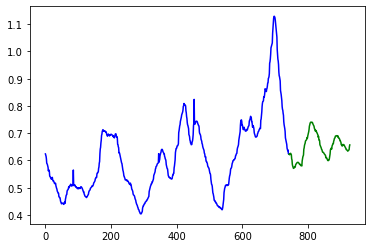

In [16]:
# Visualize the difference between train and test
plt.plot(range(int(_count * TRAIN_SPLIT)), BAWANG_MERAH_TRAIN, 'b', range(int(_count * TRAIN_SPLIT), _count), BAWANG_MERAH_TEST, 'g')
plt.show()

In [18]:
# Nyomot dari Mr. Moroney ya yang ini :)
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [19]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

tf.keras.backend.clear_session()
_input = windowed_dataset(BAWANG_MERAH_TRAIN, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER_SIZE)

bawang_merah_pred = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = False)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-1 * 10**(epoch / 20)
)

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1, momentum = 0.9)
bawang_merah_pred.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = optimizer,
    metrics = ['mae']
)

history_opt = bawang_merah_pred.fit(
    _input,
    epochs = 15,
    callbacks = [learning_rate_scheduler]
)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Epoch 1/15
18/18 [==============================] - 10s 63ms/step - loss: 0.0731 - mae: 0.3181
Epoch 2/15
18/18 [==============================] - 1s 68ms/step - loss: 0.0131 - mae: 0.1260
Epoch 3/15
18/18 [==============================] - 1s 63ms/step - loss: 0.0089 - mae: 0.1054
Epoch 4/15
18/18 [==============================] - 1s 64ms/step - loss: 0.0058 - mae: 0.0842
Epoch 5/15
18/18 [==============================] - 1s 65ms/step - loss: 0.0019 - mae: 0.0498
Epoch 6/15
18/18 [==============================] - 1s 62ms/step - loss: 0.0021 - mae: 0.0537
Epoch 7/15
18/18 [==============================] - 1s 60ms/step - loss: 0.0012 - mae: 0.0389
Epoch 8/15
18/18 [==============================] - 1s 61ms/step - loss: 9.2775e-04 - mae: 0.0350
Epoch 9/15
18/18 [==================

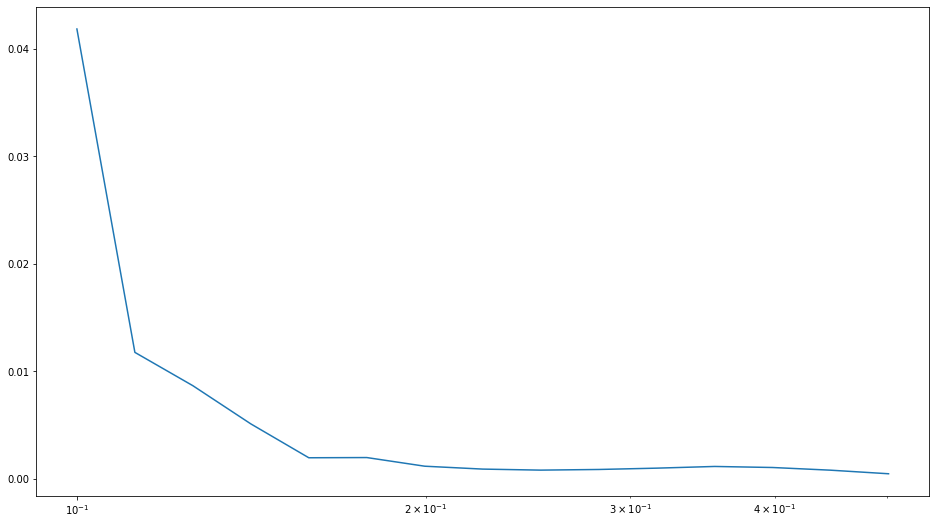

In [20]:
plt.figure(figsize=(16,9))
plt.semilogx(history_opt.history['lr'], history_opt.history['loss'])
plt.show()

Verdict: we get 1e-1 as our learning rate.

In [22]:
tf.keras.backend.clear_session()

bawang_merah_pred = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = False)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1, momentum = 0.9)
bawang_merah_pred.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = optimizer,
    metrics = ['mae']
)

history = bawang_merah_pred.fit(
    _input,
    epochs = 200,
)

/step - loss: 0.0784 - mae: 0.3258
Epoch 2/200
18/18 [==============================] - 1s 59ms/step - loss: 0.0130 - mae: 0.1241
Epoch 3/200
18/18 [==============================] - 1s 60ms/step - loss: 0.0096 - mae: 0.1078
Epoch 4/200
18/18 [==============================] - 1s 61ms/step - loss: 0.0071 - mae: 0.0948
Epoch 5/200
18/18 [==============================] - 1s 66ms/step - loss: 0.0034 - mae: 0.0670
Epoch 6/200
18/18 [==============================] - 1s 64ms/step - loss: 0.0014 - mae: 0.0437
Epoch 7/200
18/18 [==============================] - 1s 65ms/step - loss: 0.0011 - mae: 0.0390
Epoch 8/200
18/18 [==============================] - 1s 61ms/step - loss: 0.0010 - mae: 0.0369
Epoch 9/200
18/18 [==============================] - 1s 62ms/step - loss: 8.9868e-04 - mae: 0.0343
Epoch 10/200
18/18 [==============================] - 1s 63ms/step - loss: 9.6270e-04 - mae: 0.0342
Epoch 11/200
18/18 [==============================] - 1s 62ms/step - loss: 8.5579e-04 - mae: 0.0323
E

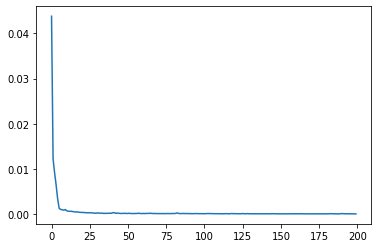

In [23]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.show()

747

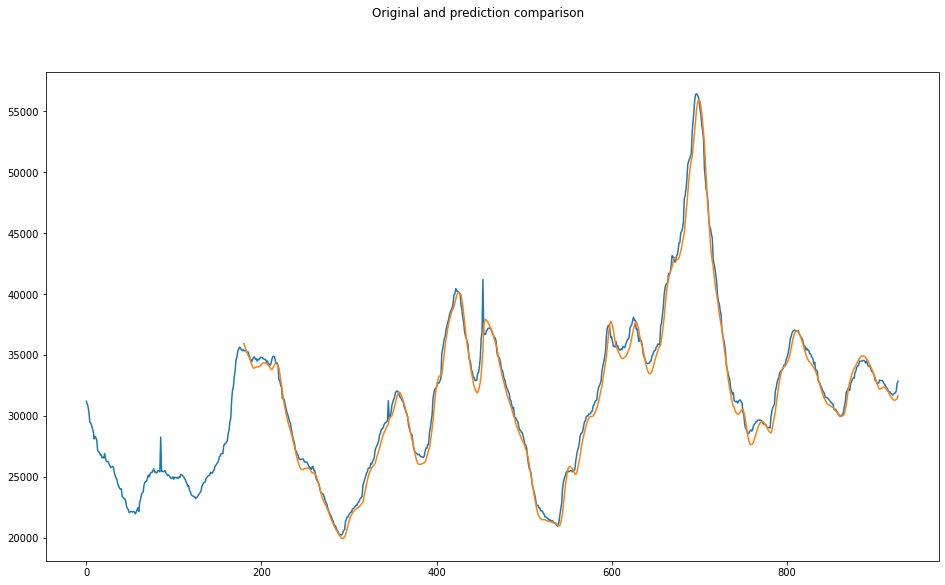

In [24]:
forecast = []
results = []
for i in range(len(BAWANG_MERAH) - WINDOW_SIZE):
    print('\r'+str(i), end='')
    forecast.append(bawang_merah_pred.predict(BAWANG_MERAH[i:i + WINDOW_SIZE][np.newaxis]))

results = np.array(forecast)[:, 0, 0]

fig = plt.figure(figsize=(16,9))
plt.suptitle('Original and prediction comparison')
plt.plot(range(len(BAWANG_MERAH)), BAWANG_MERAH * 50000)
plt.plot(range(WINDOW_SIZE, len(results) + WINDOW_SIZE), results * 50000)
plt.show()

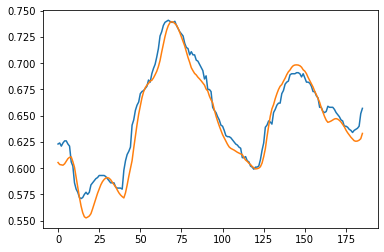

In [25]:
# FOCUS ON TEST
plt.plot(range(len(BAWANG_MERAH_TEST)), BAWANG_MERAH_TEST)
plt.plot(range(len(BAWANG_MERAH_TEST)), results[int(TRAIN_SPLIT * _count) - WINDOW_SIZE:_count - WINDOW_SIZE])

364

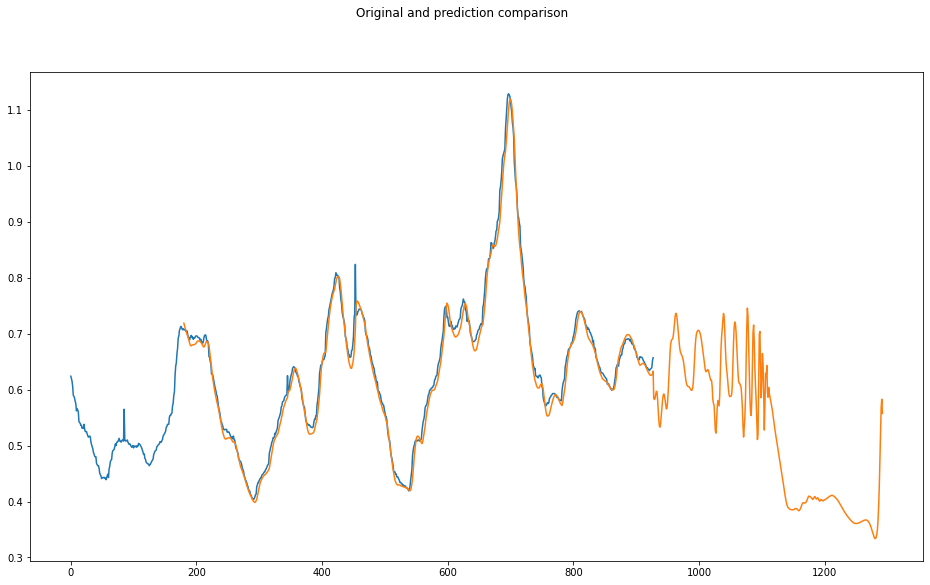

In [26]:
# Can it recommend prices for one more year? (SPOILER: DOWNSIDE KEKW)
forecast_1y = []
results_1y = results
for i in range(365):
    print('\r'+str(i), end='')
    _temp = bawang_merah_pred.predict(results_1y[
        len(results_1y) - 365 + i: len(results_1y) - 365 + i + WINDOW_SIZE
        ][np.newaxis])
    results_1y = np.append(results_1y, _temp[0, 0])

results = np.array(forecast)

fig = plt.figure(figsize=(16,9))
plt.suptitle('Original and prediction comparison')
plt.plot(range(len(BAWANG_MERAH)), BAWANG_MERAH)
plt.plot(range(WINDOW_SIZE, len(results) + 365 + WINDOW_SIZE), results_1y)
plt.show()

In [27]:
results_1y[
        len(results_1y) - 365 + i: len(results_1y) - 365 + i + WINDOW_SIZE
        ]

array([0.55752087], dtype=float32)

In [28]:
BAWANG_MERAH[1:6, np.newaxis]

array([[0.62 ],
       [0.615],
       [0.606],
       [0.59 ],
       [0.588]])

In [30]:
bawang_merah_pred.save_weights('./weights/forecast-v1/forecast-v1')

In [31]:
bawang_merah_pred.save('model/price-recom-v1')
bawang_merah_pred.save('model/price-recom-v1.h5')

INFO:tensorflow:Assets written to: model/price-recom-v1\assets
INFO:tensorflow:Assets written to: model/price-recom-v1\assets
